In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Basic packages
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
#import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
#from impute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000


In [2]:


# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
 
 
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1D4z13rFbwe6ch0WwEiCO2dd5a18avot6/view?usp=sharing'
# link2 = 'https://drive.google.com/file/d/1qLbITeJToHCKtzG2HnvSZUn5v3LeW7lg/view?usp=sharing'
 
# import pandas as pd
 
# # to get the id part of the file
# id = link.split("/")[-2]
# id2 = link2.split("/")[-2]
 
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Train_Set_TVS.csv') 
df_train = pd.read_csv("Train_Set_TVS.csv")
df_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [3]:
 
# downloaded = drive.CreateFile({'id':id2})
# downloaded.GetContentFile('Test_Set_TVS.csv') 
df_test = pd.read_csv("Test_Set_TVS.csv")
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [4]:
df_train.shape

(132440, 33)

In [5]:
df_test.shape

(56760, 32)

In [6]:
df_train.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


In [7]:
df_test.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,56760.000000,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,489156.967089,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,58459.598434,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,387653.000000,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,438878.000000,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,488939.500000,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,539700.500000,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,590401.000000,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
ID                    132440 non-null int64
Compensation          126198 non-null float64
Vehicle_Status        123336 non-null object
Loan_amt              132440 non-null float64
Annuity_amt           127829 non-null float64
density_Ind           127024 non-null float64
Job_Type              122192 non-null object
Default_hist          132440 non-null object
Prop_List             130475 non-null object
Home_Appliances       121476 non-null float64
Region_Type           132440 non-null object
Credit_Inq            129750 non-null object
Education_det         132440 non-null object
Marital_Stat          132440 non-null object
Gen                   132440 non-null object
Credit_Lnks           132440 non-null object
Experience            110595 non-null float64
Income_Alt            124758 non-null object
Day_Process           132440 non-null object
Ph.No                 132440 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
ID                    56760 non-null int64
Compensation          54010 non-null float64
Vehicle_Status        52877 non-null object
Loan_amt              56760 non-null float64
Annuity_amt           54797 non-null float64
density_Ind           54485 non-null float64
Job_Type              52440 non-null object
Default_hist          56760 non-null object
Prop_List             55849 non-null object
Home_Appliances       52001 non-null float64
Region_Type           56760 non-null object
Credit_Inq            55594 non-null object
Education_det         56760 non-null object
Marital_Stat          56760 non-null object
Gen                   56760 non-null object
Credit_Lnks           56760 non-null object
Experience            47409 non-null float64
Income_Alt            53461 non-null object
Day_Process           56760 non-null object
Ph.No                 56760 non-null object
Type_L

In [10]:
df_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [11]:
df_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [12]:
(df_train.isnull().sum()/len(df_train))*100

ID                     0.000000
Compensation           4.713078
Vehicle_Status         6.874056
Loan_amt               0.000000
Annuity_amt            3.481577
density_Ind            4.089399
Job_Type               7.737844
Default_hist           0.000000
Prop_List              1.483691
Home_Appliances        8.278466
Region_Type            0.000000
Credit_Inq             2.031108
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.494262
Income_Alt             5.800362
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.857596
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              13.223346
c2_rated              10.058140
Contact_age            6.155995
Product_

In [13]:
(df_test.isnull().sum()/len(df_test))*100

ID                     0.000000
Compensation           4.844961
Vehicle_Status         6.841085
Loan_amt               0.000000
Annuity_amt            3.458421
density_Ind            4.008104
Job_Type               7.610994
Default_hist           0.000000
Prop_List              1.605004
Home_Appliances        8.384426
Region_Type            0.000000
Credit_Inq             2.054264
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.474630
Income_Alt             5.812192
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.902396
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              12.972163
c2_rated               9.963002
Contact_age            6.205074
Product_

In [14]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    41966
N    81370
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     25722
Non-IT    29488
IT        66982
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      13270
ndf    119170
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None            13020
Morethan_One    25896
One             91559
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other      2614
Rural     22278
Metro    107548
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     9138
3     23178
2     30362
1     67072
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      6125
P_Grad    32457
Grad      93858
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       6776
Divorce     8391
Single     19664
Married    97609
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    45377
M    

In [15]:
df_train.columns = df_train.columns.str.replace('.', '_')
df_train.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

In [16]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print("Unique values in ",column.upper(),'is : ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

Unique values in  VEHICLE_STATUS is :  2
Y    18156
N    34721
Name: Vehicle_Status, dtype: int64


Unique values in  JOB_TYPE is :  3
Govt.     11008
Non-IT    12640
IT        28792
Name: Job_Type, dtype: int64


Unique values in  DEFAULT_HIST is :  2
df      5690
ndf    51070
Name: Default_hist, dtype: int64


Unique values in  PROP_LIST is :  3
None             5581
Morethan_One    11046
One             39222
Name: Prop_List, dtype: int64


Unique values in  REGION_TYPE is :  3
other     1186
Rural     9526
Metro    46048
Name: Region_Type, dtype: int64


Unique values in  CREDIT_INQ is :  4
>4     3863
3      9998
2     13030
1     28703
Name: Credit_Inq, dtype: int64


Unique values in  EDUCATION_DET is :  3
Other      2663
P_Grad    13689
Grad      40408
Name: Education_det, dtype: int64


Unique values in  MARITAL_STAT is :  4
Widow       2973
Divorce     3727
Single      8335
Married    41725
Name: Marital_Stat, dtype: int64


Unique values in  GEN is :  2
F    19501
M    37259

In [17]:
df_test.columns = df_test.columns.str.replace('.', '_')
df_test.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph_No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

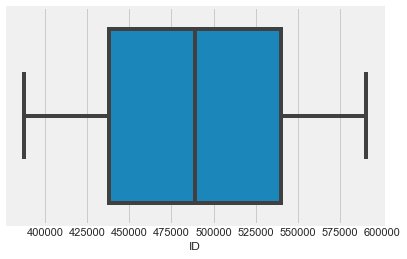

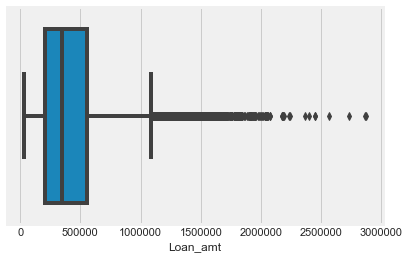

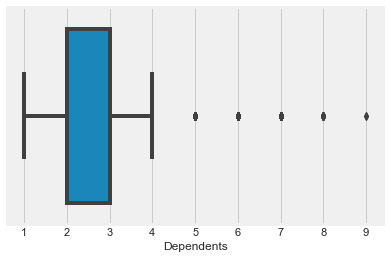

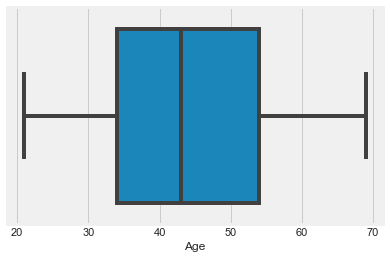

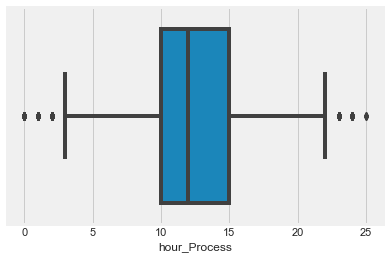

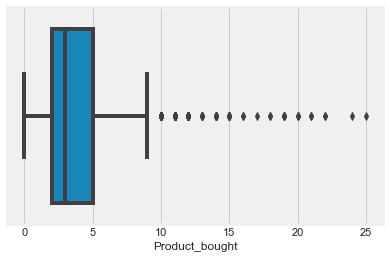

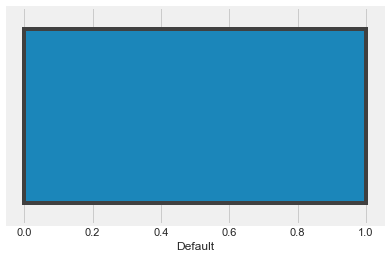

In [18]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

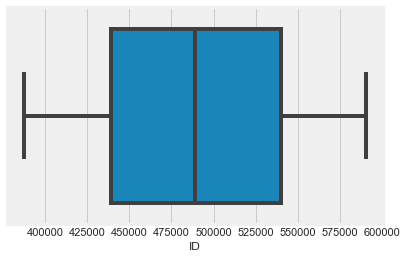

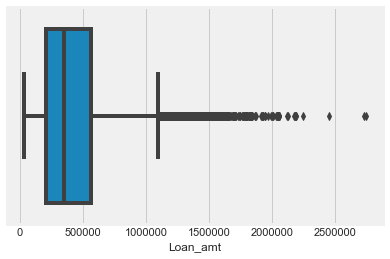

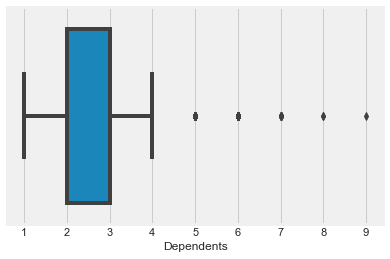

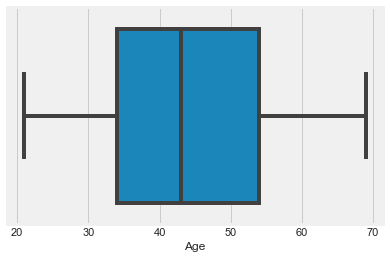

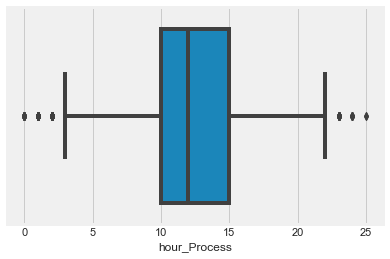

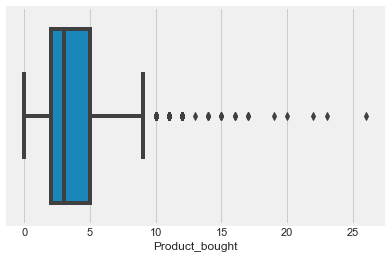

In [19]:
splot_cols=df_test.columns
for i in splot_cols:
    if df_test[i].dtype != 'object' and df_test[i].isnull().values.any() != True:
        sns.boxplot(df_test[i])
        plt.show()

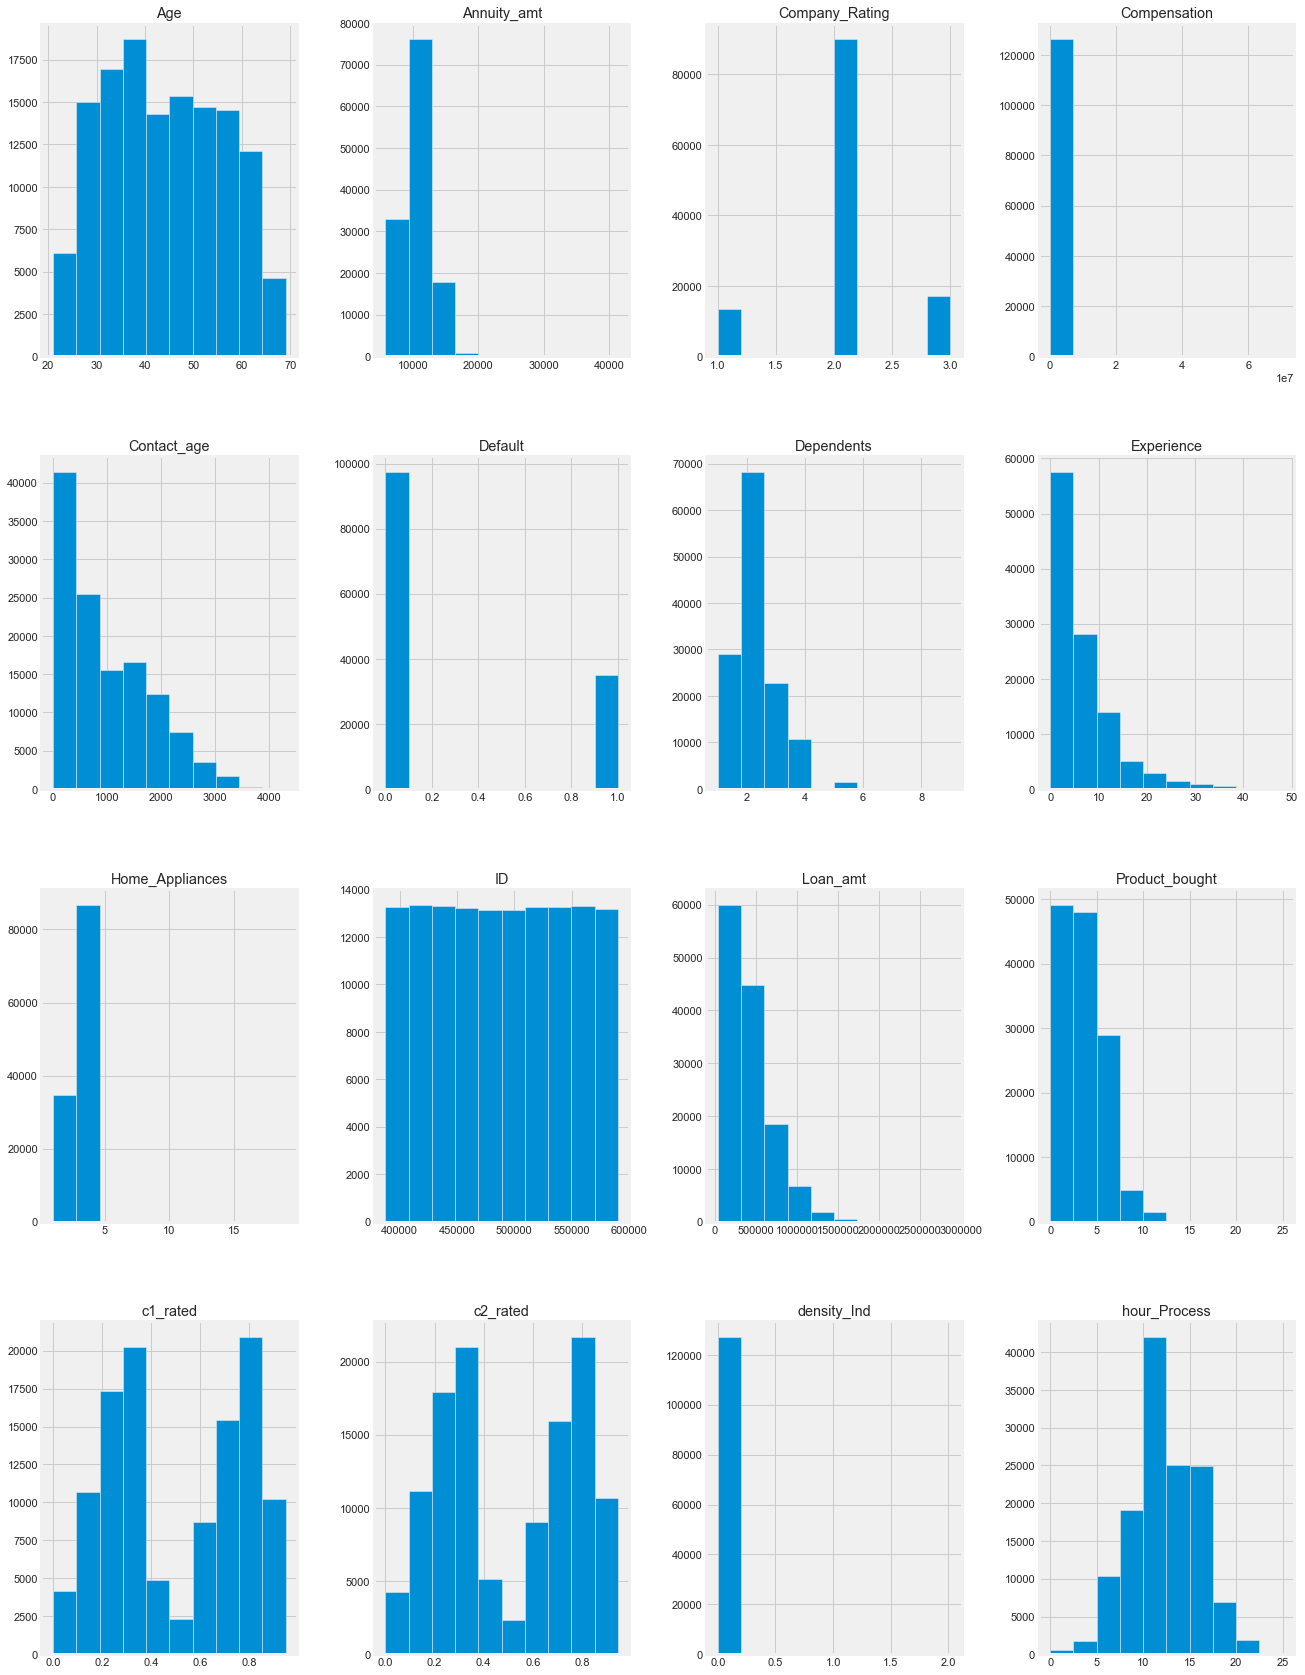

In [20]:
df_train.hist(figsize=(20,30));

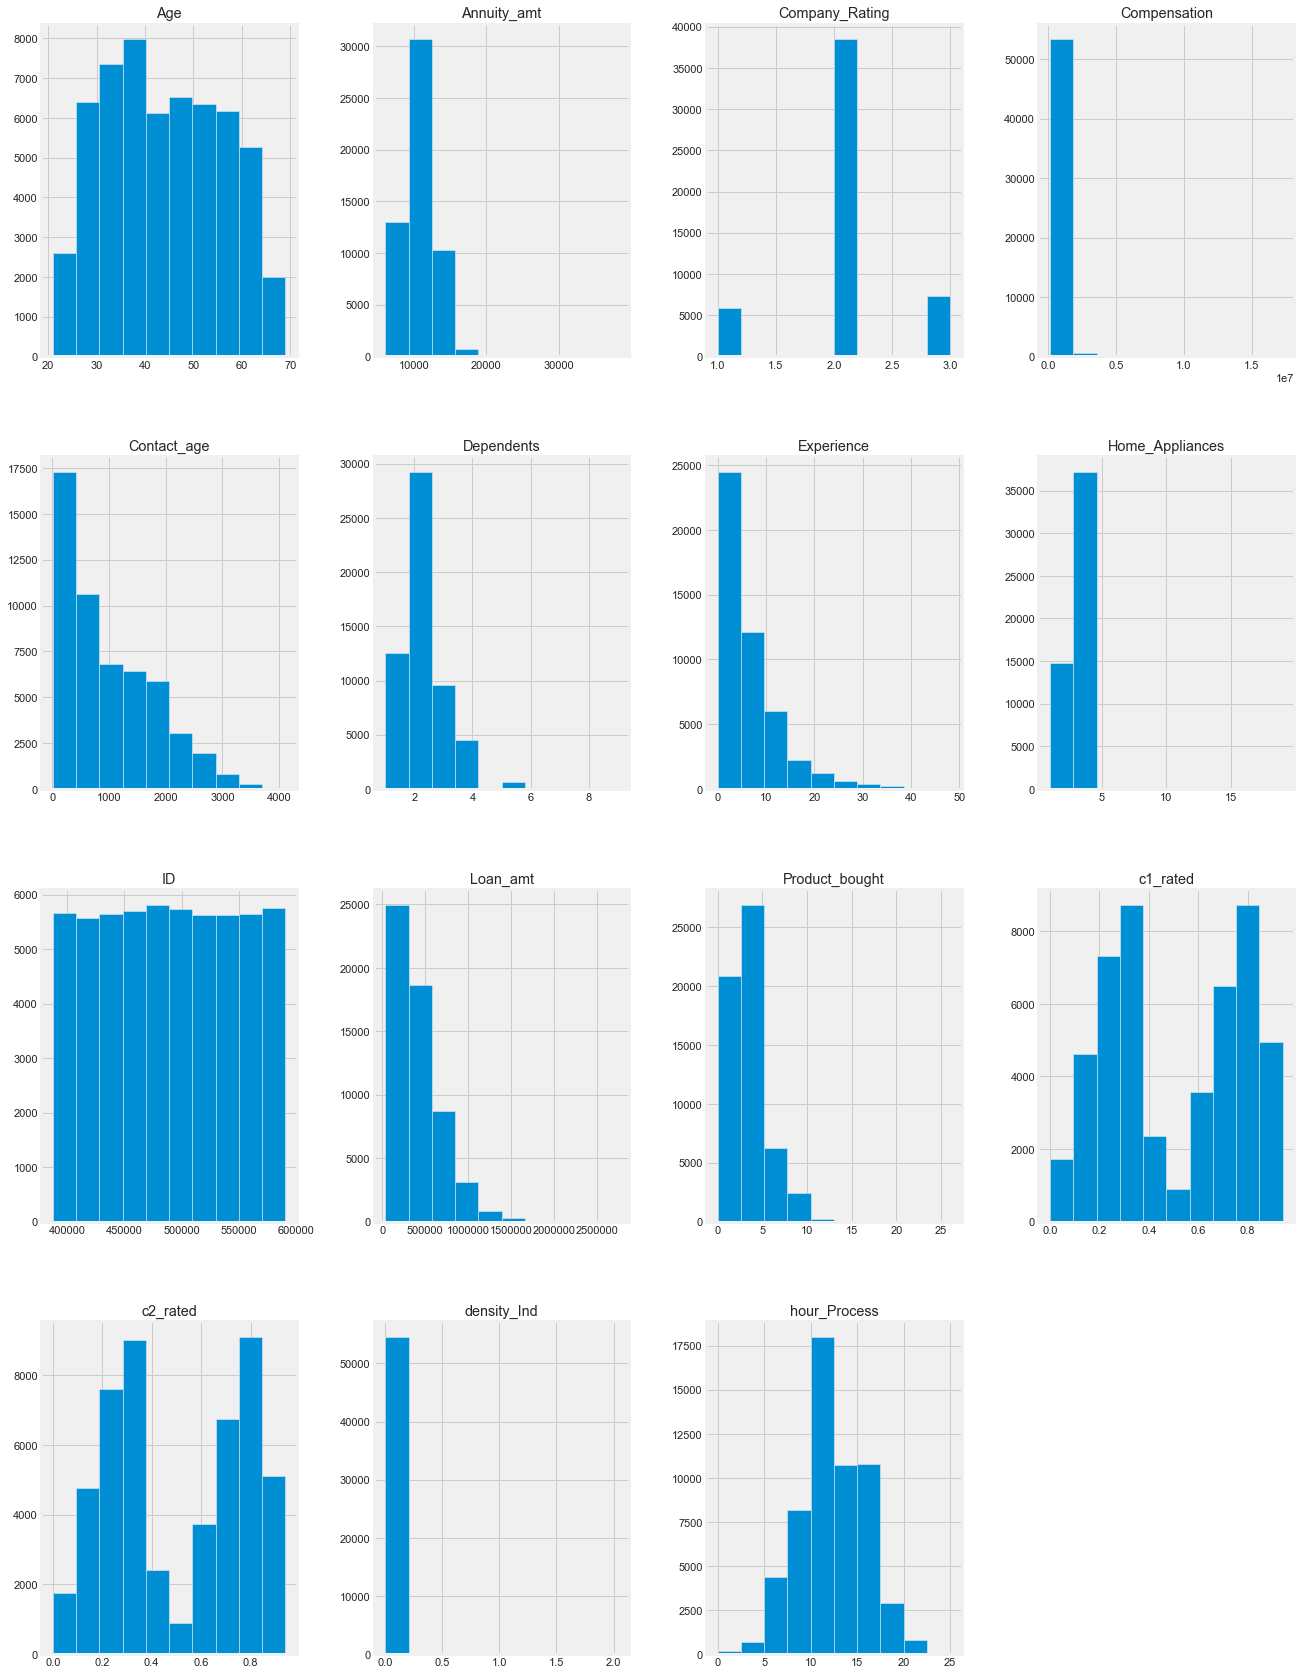

In [21]:
df_test.hist(figsize=(20,30));

sns.pairplot(df_train,diag_kind='kde',palette="tab10")

sns.pairplot(df_test,diag_kind='kde',palette="tab10")

df_train.corr()

df_test.corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True,mask=np.triu(df_train.corr(),+1))

plt.figure(figsize=(20,10))
sns.heatmap(df_test.corr(), annot=True,mask=np.triu(df_test.corr(),+1))

### Treating of Missing values

Imputing the missing values

In [ ]:
df_train = df_train.dropna(axis=0)
df_train.shape

In [ ]:
df_test = df_test.dropna(axis=0)
df_test

In [ ]:
# for column in df_train.columns:
#     if df_train[column].dtype != 'object':
#         median = df_train[column].median()
#         df_train[column] = df_train[column].fillna(median)    
        
# df_train.isnull().sum() 

In [ ]:
# for column in df_test.columns:
#     if df_test[column].dtype != 'object':
#         median = df_test[column].median()
#         df_test[column] = df_test[column].fillna(median)    
        
# df_test.isnull().sum() 

In [ ]:

# for column in df_train:
#     if df_train[column].dtype == 'object':
#         if df_train[column].isnull().any():
# #             if(column in cateogry_columns):
#                 df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
# df_train.isnull().sum() 

In [ ]:

# for column in df_test:
#     if df_test[column].dtype == 'object':
#         if df_test[column].isnull().any():
# #             if(column in cateogry_columns):
#                 df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
# df_test.isnull().sum() 

In [22]:
df_cat_train = df_train.select_dtypes(include = ['object'])
df_num_train = df_train.select_dtypes(include = ['float64','int64'])

In [23]:
df_cat_test = df_test.select_dtypes(include = ['object'])
df_num_test = df_test.select_dtypes(include = ['float64','int64'])

In [ ]:
# df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
# df_cat_train.head()

In [ ]:
# df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
# df_cat_test.head()

In [24]:
df_num_train.columns

Index(['ID', 'Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought',
       'Default'],
      dtype='object')

In [ ]:
df_train = pd.concat([df_cat_train,df_num_train],axis=1)
df_train.head()

In [ ]:
df_test = pd.concat([df_cat_test,df_num_test],axis=1)
df_test.head()

In [ ]:
df_train_copy = df_train.drop(columns=['ID'], axis=1)
df_train_copy.info()

In [ ]:
test_file_ids = df_test['ID'] ## necessary step
df_test_copy = df_test.drop(columns=['ID'], axis=1)
df_test_copy.info()

In [25]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for i in df_cat_train:
#     print(i)
    df_cat_train[i] = label_encoder.fit_transform(df_cat_train[i])
train_scaled = pd.concat([df_cat_train,df_num_train],axis=1)

In [36]:
train_scaled.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph_No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,0.878943,-0.220088,0.333697,-1.863537,-0.459795,-0.818736,-0.624036,-0.303535,-1.385157,-0.340154,-0.640258,-1.087083,0.500094,-0.323000,-0.546527,0.291037,-2.135205,0.873049,NaN,0.885543,NaN,NaN,NaN,NaN,0.929036,NaN,0.172766,-0.577807,NaN,NaN,NaN,-0.638558,1.668403
1,-0.731873,-0.220088,0.333697,-1.863537,-0.459795,0.125049,-0.624036,-0.303535,0.721940,-0.340154,-0.640258,1.336800,0.500094,-0.323000,0.446804,0.291037,0.468339,0.387664,NaN,-0.789020,NaN,NaN,NaN,NaN,0.929036,NaN,0.172766,-0.017065,NaN,NaN,NaN,0.281728,-0.599376
2,-0.731873,-1.421492,0.333697,0.579696,-0.459795,1.068835,0.539372,-0.303535,0.721940,-0.340154,-0.640258,0.367246,0.500094,-0.323000,0.446804,0.291037,0.468339,0.303062,NaN,-1.142230,NaN,NaN,NaN,NaN,-0.171022,NaN,1.092294,-1.979663,NaN,NaN,NaN,0.281728,-0.599376
3,-0.731873,0.981316,-2.996733,-0.641921,-0.459795,-0.818736,-0.624036,-0.303535,0.721940,-0.340154,-0.640258,1.336800,0.500094,3.095971,1.440135,0.291037,0.468339,0.177942,NaN,-0.858436,NaN,NaN,NaN,NaN,2.029094,NaN,-0.412388,-0.017065,NaN,NaN,NaN,0.281728,-0.599376
4,0.878943,0.981316,0.333697,-1.863537,1.754094,0.125049,-0.624036,-0.303535,-1.385157,2.391801,1.046414,-0.602307,0.500094,-0.323000,0.446804,0.291037,0.468339,-0.863753,NaN,0.578547,NaN,NaN,NaN,NaN,0.929036,NaN,-0.997543,1.104420,NaN,NaN,NaN,1.202014,-0.599376


In [27]:
from scipy.stats import zscore
train_scaled = train_scaled.apply(zscore)
# train_scaled = pd.concat([df_cat_train,df_num_train],axis=1)
train_scaled.head()

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph_No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,0.878943,-0.220088,0.333697,-1.863537,-0.459795,-0.818736,-0.624036,-0.303535,-1.385157,-0.340154,-0.640258,-1.087083,0.500094,-0.323000,-0.546527,0.291037,-2.135205,0.873049,NaN,0.885543,NaN,NaN,NaN,NaN,0.929036,NaN,0.172766,-0.577807,NaN,NaN,NaN,-0.638558,1.668403
1,-0.731873,-0.220088,0.333697,-1.863537,-0.459795,0.125049,-0.624036,-0.303535,0.721940,-0.340154,-0.640258,1.336800,0.500094,-0.323000,0.446804,0.291037,0.468339,0.387664,NaN,-0.789020,NaN,NaN,NaN,NaN,0.929036,NaN,0.172766,-0.017065,NaN,NaN,NaN,0.281728,-0.599376
2,-0.731873,-1.421492,0.333697,0.579696,-0.459795,1.068835,0.539372,-0.303535,0.721940,-0.340154,-0.640258,0.367246,0.500094,-0.323000,0.446804,0.291037,0.468339,0.303062,NaN,-1.142230,NaN,NaN,NaN,NaN,-0.171022,NaN,1.092294,-1.979663,NaN,NaN,NaN,0.281728,-0.599376
3,-0.731873,0.981316,-2.996733,-0.641921,-0.459795,-0.818736,-0.624036,-0.303535,0.721940,-0.340154,-0.640258,1.336800,0.500094,3.095971,1.440135,0.291037,0.468339,0.177942,NaN,-0.858436,NaN,NaN,NaN,NaN,2.029094,NaN,-0.412388,-0.017065,NaN,NaN,NaN,0.281728,-0.599376
4,0.878943,0.981316,0.333697,-1.863537,1.754094,0.125049,-0.624036,-0.303535,-1.385157,2.391801,1.046414,-0.602307,0.500094,-0.323000,0.446804,0.291037,0.468339,-0.863753,NaN,0.578547,NaN,NaN,NaN,NaN,0.929036,NaN,-0.997543,1.104420,NaN,NaN,NaN,1.202014,-0.599376


In [ ]:
# df_num_test = df_num_test.apply(zscore)
# df_test = pd.concat([df_cat_test,df_num_test],axis=1)
# test_scaled = df_test.apply(zscore)

In [28]:
x = train_scaled.drop('Default', axis=1)

y = train_scaled['Default']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42,stratify=y)
x_train.shape

(105952, 32)

In [30]:
y_train.shape

(105952,)

In [31]:
x_test.shape

(26488, 32)

In [32]:
y_test.shape

(26488,)

### Logistic Regression

In [33]:
grid={'penalty':['l1','l2','none'],
      'solver':['liblinear'],
      'tol':[0.0001,0.00001,0.000001]}

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [35]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
grid_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_
best_model

In [ ]:
ytrain_predict = best_model.predict(x_train)
ytrain_predict

In [ ]:
ytest_predict = best_model.predict(x_test)
ytest_predict

In [ ]:
Logistic_regression = grid_search.score(x_test, y_test)
Logistic_regression

In [ ]:
print(classification_report(y_train, ytrain_predict),'\n')

In [ ]:
print(classification_report(y_test, ytest_predict),'\n')

In [ ]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
dftra=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(dftra.loc["1.0"][2],2)
print ('lr_test_f1 ',lr_test_f1)

In [ ]:
resultsDf = pd.DataFrame({'f1':lr_test_f1},index=['Logistic Regression'])
resultsDf

Random Forest

In [ ]:
param_grid_RF = {
    'max_depth': [150,175,200],
    'max_features': [40,50,60],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [100,150,200],
    'n_estimators': [50,70] 
}

In [37]:
rfcl = RandomForestClassifier(random_state=42)

rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_RF, cv = 3) 
rfcl = rfcl.fit(x_train, y_train)

NameError: name 'param_grid_RF' is not defined

In [ ]:
rfcl.best_params_

In [ ]:
rfcl = rfcl.best_estimator_

In [ ]:
ytrain_predict = rfcl.predict(x_train)
ytrain_predict

In [ ]:
ytest_predict = rfcl.predict(x_test)
ytest_predict

In [ ]:
print(classification_report(y_train, ytrain_predict),'\n')

In [ ]:
print(classification_report(y_test, ytest_predict),'\n')

In [ ]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
dftra=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(dftra.loc["1.0"][2],2)
print ('rf_test_f1 ',rf_test_f1)

Decision Tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search = grid_search.best_estimator_

In [ ]:
ytrain_predict = grid_search.predict(x_train)
ytrain_predict

In [ ]:
ytest_predict = grid_search.predict(x_test)
ytest_predict

In [ ]:
print(classification_report(y_train, ytrain_predict),'\n')

In [ ]:
print(classification_report(y_test, ytest_predict),'\n')